**Telco Customer Churn Prediction**

En este proyecto se hara una prediccion de "churn" para una telco compania usando varios modelos


Carga de Dataset

In [44]:
import pandas as pd

# Cargar el archivo CSV
df = pd.read_csv('telco.csv')



In [45]:
df.shape

(7043, 21)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Eliminamos columna ID

In [48]:
df=df.drop(['customerID'], axis=1)

### Inspeccion de Datos inicial

Columnas Numericas y Categoricas

In [49]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
Numerical columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


### Valores Faltantes

In [50]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Note: Handling of missing values will be done during preprocessing in the pipeline.
# Outlier detection and handling can be explored further if needed.

Missing values per column:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Analisis Estadistico de datos de variables
Distribucion de valores por cada variable

In [51]:
# Statistical summary of numerical columns
print("Statistical summary of numerical columns:")
display(df[numerical_cols].describe())

# Statistical summary of categorical columns
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Statistical summary of numerical columns:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



Value counts for categorical columns:

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No                     3095
Yes        

Reemplazo de valores de variables por sus equivalentes

In [52]:
df['OnlineBackup'] = df['OnlineBackup'].str.replace("No internet service", "No", case=False, regex=False)
df['DeviceProtection'] = df['DeviceProtection'].str.replace("No internet service", "No", case=False, regex=False)
df['TechSupport'] = df['TechSupport'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingTV'] = df['StreamingTV'].str.replace("No internet service", "No", case=False, regex=False)
df['StreamingMovies'] = df['StreamingMovies'].str.replace("No internet service", "No", case=False, regex=False)
df['OnlineSecurity'] = df['OnlineSecurity'].str.replace("No internet service", "No", case=False, regex=False)
df['MultipleLines'] = df['MultipleLines'].str.replace("No phone service", "No", case=False, regex=False)


In [53]:
# Statistical summary of categorical columns
print("\nValue counts for categorical columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Value counts for categorical columns:

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64

Column: OnlineBackup
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64

Column: DeviceProtection
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64

Column: TechSupport
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64

Column: StreamingTV
StreamingTV
No     4336
Yes    2707
Name: count, dtype: 

In [54]:
df["SeniorCitizen"].describe()

,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [55]:
df["SeniorCitizen"].value_counts(normalize=True)

,proportion
SeniorCitizen,
0,0.837853
1,0.162147


In [56]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [57]:

categorical_cols.append("SeniorCitizen")
numerical_cols.remove("SeniorCitizen")
numerical_cols.append("TotalCharges")


In [58]:

numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

### Analisis exploratorio de Datos(EDA)

#### Distribucion de variables categoricas

In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# for col in categorical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.countplot(data=df, x=col, hue='Churn')
#     plt.title(f'Distribution of {col} by Churn')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

#### Distribucion de variables Numericas

In [60]:
numerical_cols



['tenure', 'MonthlyCharges', 'TotalCharges']

In [61]:
# for col in numerical_cols:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(data=df, x=col, kde=True, hue='Churn')
#     plt.title(f'Distribution of {col} by Churn')
#     plt.tight_layout()
#     plt.show()

#### Correlacion de variables numericas

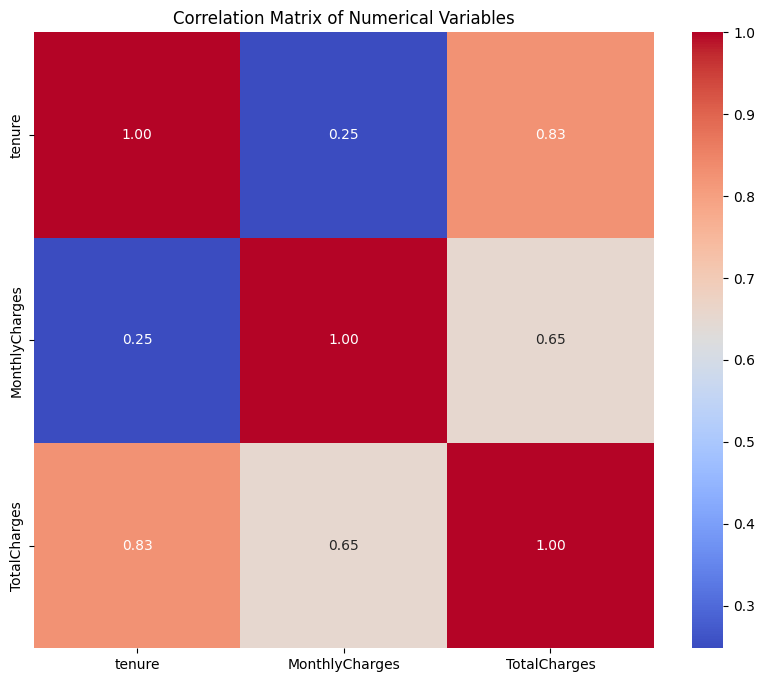

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

#
# Ensure 'TotalCharges' is numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Calculate correlation matrix - now TotalCharges should be numeric
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

#### Relacion entre caracteristicas y variable objetivo

Grafico de cajas y bigotes para outliers

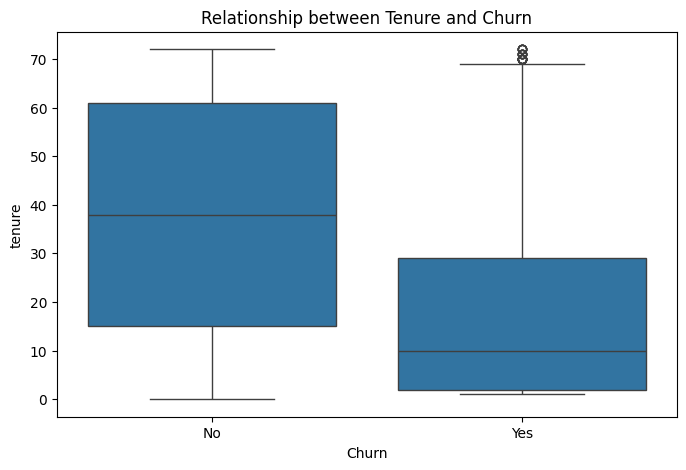

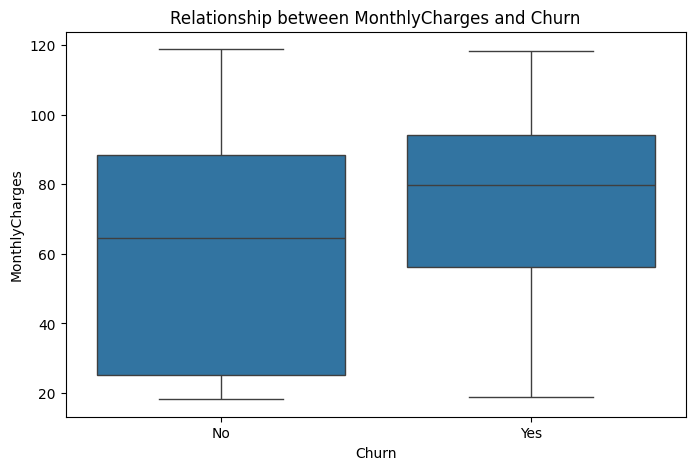

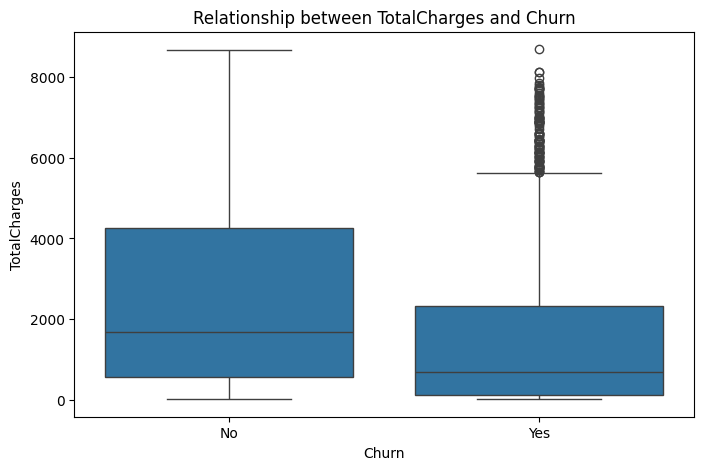

In [63]:
# Example: Relationship between tenure and Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Relationship between Tenure and Churn')
plt.show()

# Example: Relationship between MonthlyCharges and Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Relationship between MonthlyCharges and Churn')
plt.show()

# Example: Relationship between TotalCharges and Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Relationship between TotalCharges and Churn')
plt.show()

Usaremos una funciona logaritmica para mejorar estos datos con outliers

In [64]:
import numpy as np

# Apply logarithmic transformation to 'TotalCharges'
# Use log1p to handle potential zero values by adding 1 before taking the log
df['TotalCharges'] = np.log1p(df['TotalCharges'])
df['tenure'] = np.log1p(df['tenure'])

# You can then drop the original 'TotalCharges' column if you only want to use the transformed one
# df = df.drop('TotalCharges', axis=1)

# Display the first few rows to see the new column
display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,0.693147,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.429137,No
1,Male,0,No,No,3.555348,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,7.544597,No
2,Male,0,No,No,1.098612,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.692723,Yes
3,Male,0,No,No,3.828641,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,7.518471,No
4,Female,0,No,No,1.098612,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.028148,Yes


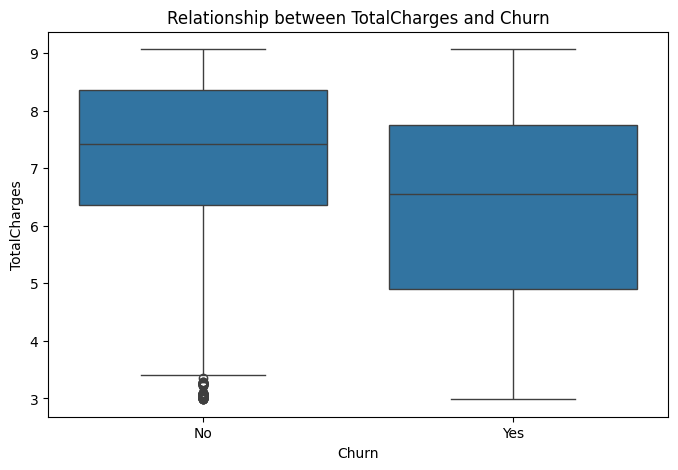

In [65]:
# Example: Relationship between TotalCharges and Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Relationship between TotalCharges and Churn')
plt.show()

Separacion caracteristicas y variable objetivo

In [66]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [67]:
import numpy as np


X = X.replace(' ', np.nan)
y = y.replace(' ', np.nan)


In [68]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,0.693147,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,3.429137
1,Male,0,No,No,3.555348,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,7.544597
2,Male,0,No,No,1.098612,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,4.692723
3,Male,0,No,No,3.828641,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,7.518471
4,Female,0,No,No,1.098612,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,5.028148


In [69]:
# Re-identify categorical and numerical columns based on current dtypes after conversions
# Assuming 'SeniorCitizen' should be treated as nominal and 'TotalCharges' as numerical
categorical_cols = df.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

# Ensure 'SeniorCitizen' is in categorical_cols and 'TotalCharges' is in numerical_cols if their dtypes were somehow missed
if 'SeniorCitizen' in numerical_cols:
    numerical_cols.remove('SeniorCitizen')
    if 'SeniorCitizen' not in categorical_cols:
        categorical_cols.append('SeniorCitizen')

if 'TotalCharges' in categorical_cols:
    categorical_cols.remove('TotalCharges')
    if 'TotalCharges' not in numerical_cols:
        numerical_cols.append('TotalCharges')

# Remove 'Churn' from the nominal columns as it's the target variable and not in X
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')

# Define the lists used for the ColumnTransformer
nominal_cols = categorical_cols
numeric_cols = numerical_cols


print("Columnas numéricas:", numerical_cols)
print("Columnas nominales:", categorical_cols)

Columnas numéricas: ['tenure', 'MonthlyCharges', 'TotalCharges']
Columnas nominales: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


Creacion de pipelines, y columnstranform numeric, ordinal

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


nominal_pipeline = Pipeline([
    ('imputacion_nom', SimpleImputer(strategy='most_frequent')),
    ('encodage_nom', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numeric_pipeline = Pipeline([
    ('imputacion_num', SimpleImputer(strategy='median')),
    ('escalamiento', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('nom', nominal_pipeline, nominal_cols),
    ('num', numeric_pipeline, numeric_cols)
], remainder='drop')


pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('clasificador', RandomForestClassifier())
])



In [71]:
X.shape

(7043, 19)

In [72]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   object 
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 
 17

In [74]:
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('imputacion_nom',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encodage_nom',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('imputacion_num',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('escalamiento',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('clasificador', RandomForestClassifier())])

Prueba en modelo Random Forest

In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

pipeline_rf.fit(X_train, y_train_enc)
y_pred = pipeline_rf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test_enc, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [76]:
# Access the fitted preprocessor from the pipeline
fitted_preprocessor = pipeline_rf.named_steps['preprocessor']

# Transform the training data and check the shape
X_train_transformed_shape = fitted_preprocessor.transform(X_train).shape
print("Shape of X_train after ColumnTransformer:", X_train_transformed_shape)

# The number of columns after transformation is the second element of the shape tuple
num_cols_after_transform = X_train_transformed_shape[1]
print("Number of columns after ColumnTransformer:", num_cols_after_transform)

Shape of X_train after ColumnTransformer: (5634, 39)
Number of columns after ColumnTransformer: 39


PRIMERA RED NEURONAL USANDO CON TODAS LAS CARACTERISTICAS

In [77]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [78]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(X_train_transformed_shape[1],)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(25, activation='relu'))
network.add(layers.Dense(2, activation='sigmoid')) #sigmoid



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [79]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        12,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,477 (189.36 KB)

 Trainable params: 48,477 (189.36 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
network.layers

[<Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>]

In [81]:
hidden1 = network.layers[1]

In [82]:
weights, biases = hidden1.get_weights()

In [83]:
network.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision'])

In [84]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test) # Assuming y_test is available and needs encoding

y_train_prep = to_categorical(y_train_encoded)
# If y_test is used later with to_categorical, you would do:
# y_test_prep = to_categorical(y_test_encoded)

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear el callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',      # Métrica a vigilar (puede ser 'val_accuracy', etc.)
    patience=3,              # Número de epochs sin mejora antes de detener
    restore_best_weights=True  # Restaura los mejores pesos
)

In [86]:
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(float)
        X_test[col] = X_test[col].astype(float)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   SeniorCitizen     5634 non-null   object 
 2   Partner           5634 non-null   object 
 3   Dependents        5634 non-null   object 
 4   tenure            5634 non-null   float64
 5   PhoneService      5634 non-null   object 
 6   MultipleLines     5634 non-null   object 
 7   InternetService   5634 non-null   object 
 8   OnlineSecurity    5634 non-null   object 
 9   OnlineBackup      5634 non-null   object 
 10  DeviceProtection  5634 non-null   object 
 11  TechSupport       5634 non-null   object 
 12  StreamingTV       5634 non-null   object 
 13  StreamingMovies   5634 non-null   object 
 14  Contract          5634 non-null   object 
 15  PaperlessBilling  5634 non-null   object 
 16  PaymentMethod     5634 non-null   object 
 17

In [87]:
X_train_prep = preprocessor.transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Ensure y_train_prep and y_test_prep are one-hot encoded
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are still the original string labels
# If y_train_encoded/y_test_encoded are already available from previous steps, you can use them directly
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_prep = to_categorical(y_train_encoded)
y_test_prep = to_categorical(y_test_encoded)

In [88]:
X_train_prep.shape

(5634, 39)

In [89]:
# Entrenar la red con el callback
history = network.fit(
    X_train_prep,
    y_train_prep,
    epochs=30,
    validation_data=(X_test_prep, y_test_prep),
    callbacks=[early_stop]
)

Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Precision: 0.7755 - accuracy: 0.7686 - loss: 0.4786 - val_Precision: 0.8086 - val_accuracy: 0.8112 - val_loss: 0.4012
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8025 - accuracy: 0.8018 - loss: 0.4127 - val_Precision: 0.8029 - val_accuracy: 0.8070 - val_loss: 0.4044
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8096 - accuracy: 0.8110 - loss: 0.4050 - val_Precision: 0.8009 - val_accuracy: 0.8006 - val_loss: 0.4069
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.7999 - accuracy: 0.7998 - loss: 0.4141 - val_Precision: 0.8157 - val_accuracy: 0.8141 - val_loss: 0.4004
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8069 - accuracy: 0.8078 - loss: 0.4089 - val_Precision: 0.8122 - val_accuracy: 0.8133 - val_loss: 0.3972
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8076 - accuracy: 0.8083 - loss: 0.4056 - val_Precision: 0.8024 - val_accu

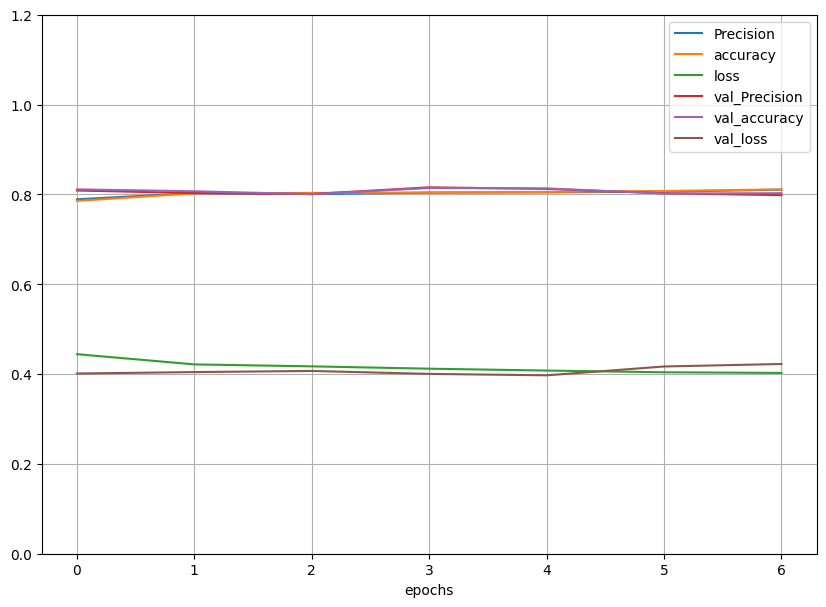

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history .history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

In [91]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.8075 - accuracy: 0.8065 - loss: 0.4019


In [92]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.8140525221824646
test_prec: 0.8157142996788025


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Classification Report:
              precision    recall  f1-score      support
0              0.846774  0.912162  0.878253  1036.000000
1              0.689420  0.541555  0.606607   373.000000
accuracy       0.814053  0.814053  0.814053     0.814053
macro avg      0.768097  0.726859  0.742430  1409.000000
weighted avg   0.805118  0.814053  0.806341  1409.000000


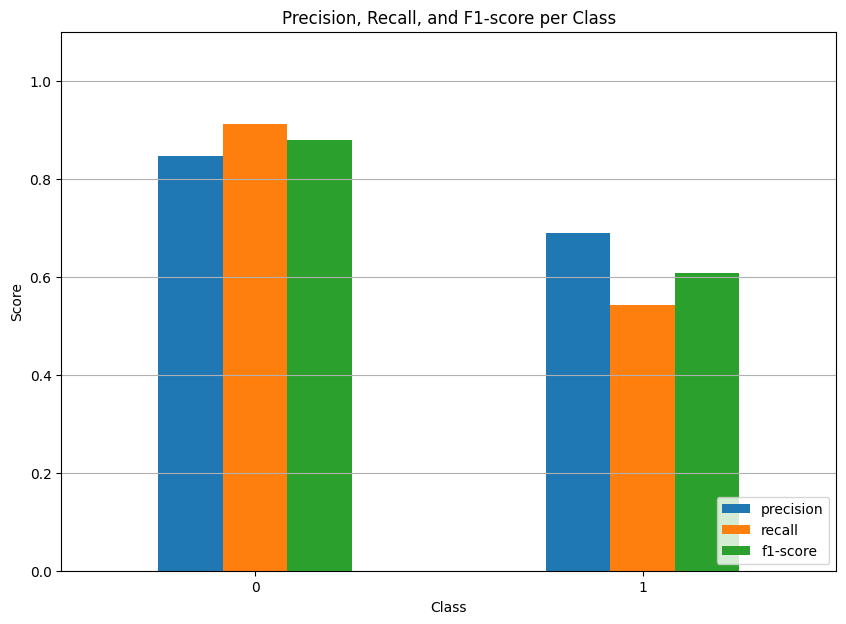

In [93]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true and y_pred are already calculated from the previous step
y_true = y_test_encoded
y_pred = np.argmax(network.predict(X_test_prep), axis=1)

report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("Classification Report:")
print(df_report)

# Remove accuracy, macro avg and weighted avg rows for plotting
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 7))
plt.title('Precision, Recall, and F1-score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

SELECCION DE MEJORES CARACTERISTICAS SEGUN MODELO RANDOM FOREST

In [94]:
import numpy as np

modelo = pipeline_rf.named_steps['clasificador']

# 3️⃣ Obtener los nombres de las columnas transformadas por el preprocesador
feature_names_num = numeric_cols
feature_names_cat = list(
    pipeline_rf.named_steps['preprocessor']
    .named_transformers_['nom']
    .named_steps['encodage_nom']
    .get_feature_names_out(nominal_cols)
)

# Combinar nombres
all_features = np.concatenate([feature_names_cat, feature_names_num])

# 4️⃣ Obtener las importancias del modelo
importances = modelo.feature_importances_

# 5️⃣ Crear un DataFrame ordenado
importances_df = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# 6️⃣ Mostrar las más importantes
print(importances_df.head(15))

                           feature  importance
38                    TotalCharges    0.163651
37                  MonthlyCharges    0.148128
36                          tenure    0.138028
27         Contract_Month-to-month    0.073300
13     InternetService_Fiber optic    0.034847
34  PaymentMethod_Electronic check    0.033254
29               Contract_Two year    0.018426
1                      gender_Male    0.018098
0                    gender_Female    0.017719
31            PaperlessBilling_Yes    0.017338
4                       Partner_No    0.014788
5                      Partner_Yes    0.014629
30             PaperlessBilling_No    0.014093
18                OnlineBackup_Yes    0.013946
17                 OnlineBackup_No    0.013586


VARIABLES ORDINALES Y NUMERICAS ACTUALIZADO CON MEJORES CARACTERISTICAS

In [95]:
# Obtener la lista de las top 15 características importantes
top_15_features = importances_df['feature'].head(15).tolist()

# Initialize lists for filtered numeric and nominal columns
numeric_cols_top_15 = []
nominal_cols_top_15 = []

# Iterate through the top 15 features
for feature in top_15_features:
    if feature in numeric_cols:
        # If the feature is a numeric column, add it to the numeric list
        numeric_cols_top_15.append(feature)
    else:
        # If the feature is not a numeric column, it must be a nominal feature (likely one-hot encoded)
        # Find the original nominal column name
        for col in nominal_cols:
            if feature.startswith(col):
                # If the original nominal column is not already in the list, add it
                if col not in nominal_cols_top_15:
                    nominal_cols_top_15.append(col)
                break # Move to the next feature in top_15_features

print("Columnas numéricas (Top 10):", numeric_cols_top_15)
print("Columnas nominales (Top 10):", nominal_cols_top_15)

Columnas numéricas (Top 10): ['TotalCharges', 'MonthlyCharges', 'tenure']
Columnas nominales (Top 10): ['Contract', 'InternetService', 'PaymentMethod', 'gender', 'PaperlessBilling', 'Partner', 'OnlineBackup']


In [96]:
# Combine the top  numeric and nominal column names
top_15_cols = numeric_cols_top_15 + nominal_cols_top_15

X = df[top_15_cols]
y = df['Churn']

In [97]:
X

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,gender,PaperlessBilling,Partner,OnlineBackup
0,3.429137,29.85,0.693147,Month-to-month,DSL,Electronic check,Female,Yes,Yes,Yes
1,7.544597,56.95,3.555348,One year,DSL,Mailed check,Male,No,No,No
2,4.692723,53.85,1.098612,Month-to-month,DSL,Mailed check,Male,Yes,No,Yes
3,7.518471,42.30,3.828641,One year,DSL,Bank transfer (automatic),Male,No,No,No
4,5.028148,70.70,1.098612,Month-to-month,Fiber optic,Electronic check,Female,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...
7038,7.596643,84.80,3.218876,One year,DSL,Mailed check,Male,Yes,Yes,No
7039,8.904345,103.20,4.290459,One year,Fiber optic,Credit card (automatic),Female,Yes,Yes,Yes
7040,5.850621,29.60,2.484907,Month-to-month,DSL,Electronic check,Female,Yes,Yes,No
7041,5.728800,74.40,1.609438,Month-to-month,Fiber optic,Mailed check,Male,Yes,Yes,No


In [98]:

preprocessor = ColumnTransformer([
    ('nom', nominal_pipeline, nominal_cols_top_15),
    ('num', numeric_pipeline, numeric_cols_top_15)
], remainder='drop')



In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      7032 non-null   float64
 1   MonthlyCharges    7043 non-null   float64
 2   tenure            7043 non-null   float64
 3   Contract          7043 non-null   object 
 4   InternetService   7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   gender            7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   Partner           7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
dtypes: float64(3), object(7)
memory usage: 550.4+ KB


RED NEURONAL CON MEJORES CARACTERISTICAS

In [100]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (X_train and X_test will be Dataframes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# No need to preprocess here, as the pipeline will handle it

In [101]:
X_train.shape

(5634, 10)

In [102]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_prep = to_categorical(y_train_encoded)
y_test_prep = to_categorical(y_test_encoded)
# y_val_prep = to_categorical(y_val) # y_val is not defined, removed this line

In [103]:
from tensorflow.keras.callbacks import EarlyStopping

# Crear el callback EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',      # Métrica a vigilar (puede ser 'val_accuracy', etc.)
    patience=3,              # Número de epochs sin mejora antes de detener
    restore_best_weights=True  # Restaura los mejores pesos
)

In [104]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
# Ensure y_train_prep and y_test_prep are one-hot encoded
y_train_prep = to_categorical(y_train_encoded) # y_train_encoded should be available
y_test_prep = to_categorical(y_test_encoded)   # y_test_encoded should be available

In [105]:
X_train_prep.shape

(5634, 21)

In [106]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [107]:
network = models.Sequential()

network.add(layers.Dense(300, activation='relu', input_shape=(X_train_prep.shape[1],)))
network.add(layers.Dense(100, activation='relu'))
network.add(layers.Dense(50, activation='relu'))
network.add(layers.Dense(25, activation='relu'))
network.add(layers.Dense(2, activation='sigmoid')) #sigmoid

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 300)            │         6,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,077 (168.27 KB)

 Trainable params: 43,077 (168.27 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
network.layers

[<Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>,
 <Dense name=dense_9, built=True>]

In [110]:
hidden1 = network.layers[1]

In [111]:
weights, biases = hidden1.get_weights()

In [112]:
network.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision'])

In [113]:

X_train

,TotalCharges,MonthlyCharges,tenure,Contract,InternetService,PaymentMethod,gender,PaperlessBilling,Partner,OnlineBackup
3738,7.439941,49.20,3.583519,Month-to-month,DSL,Electronic check,Male,No,No,No
3151,7.049732,75.10,2.772589,Month-to-month,Fiber optic,Mailed check,Male,No,Yes,No
4860,6.382408,40.55,2.639057,Two year,DSL,Mailed check,Male,No,Yes,Yes
3867,7.553129,73.50,3.295837,Two year,DSL,Credit card (automatic),Female,Yes,Yes,Yes
3810,3.818811,44.55,0.693147,Month-to-month,DSL,Electronic check,Male,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
6303,8.950105,109.25,4.276666,Two year,Fiber optic,Electronic check,Female,No,Yes,Yes
6227,4.398761,46.05,1.098612,Month-to-month,DSL,Bank transfer (automatic),Male,No,No,No
4673,7.886532,102.80,3.258097,Month-to-month,Fiber optic,Mailed check,Female,Yes,No,Yes
2710,6.181672,20.40,3.218876,One year,No,Credit card (automatic),Female,No,Yes,No


In [114]:


# Entrenar la red con el callback
history = network.fit(
    X_train_prep,
    y_train_prep,
    epochs=30,
    validation_data=(X_test_prep, y_test_prep),
    callbacks=[early_stop]
)

Epoch 1/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Precision: 0.7535 - accuracy: 0.7541 - loss: 0.4944 - val_Precision: 0.7835 - val_accuracy: 0.7835 - val_loss: 0.4320
Epoch 2/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Precision: 0.7984 - accuracy: 0.7981 - loss: 0.4223 - val_Precision: 0.7881 - val_accuracy: 0.7850 - val_loss: 0.4232
Epoch 3/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.7975 - accuracy: 0.7993 - loss: 0.4139 - val_Precision: 0.7956 - val_accuracy: 0.7956 - val_loss: 0.4233
Epoch 4/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - Precision: 0.8074 - accuracy: 0.8060 - loss: 0.4098 - val_Precision: 0.7958 - val_accuracy: 0.7977 - val_loss: 0.4208
Epoch 5/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8039 - accuracy: 0.8032 - loss: 0.4182 - val_Precision: 0.7966 - val_accuracy: 0.7963 - val_loss: 0.4301
Epoch 6/30
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Precision: 0.8060 - accuracy: 0.8061 - loss: 0.4182 - val_Precision: 0.7960 - val_accu

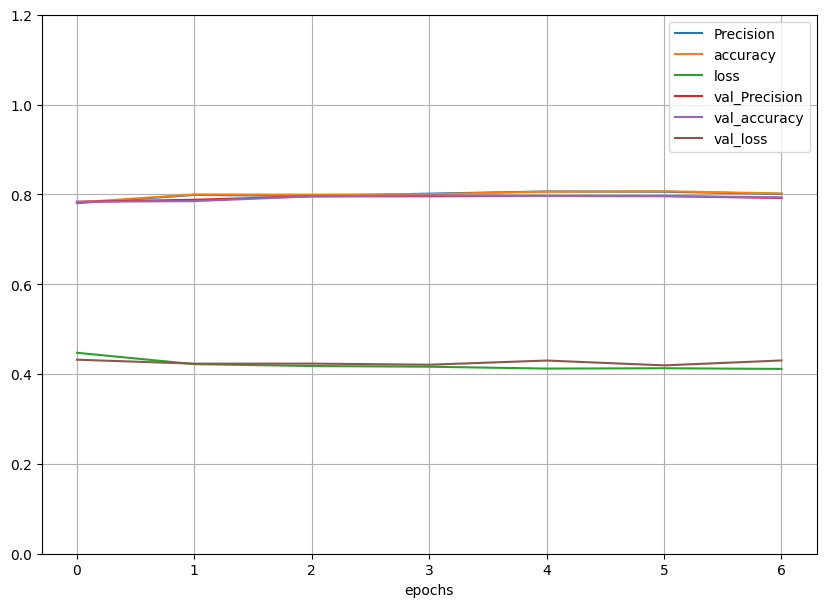

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history .history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1.2)
plt.xlabel("epochs")
plt.show()

In [116]:
test_loss, test_acc, test_prec = network.evaluate(X_test_prep, y_test_prep)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.7886 - accuracy: 0.7887 - loss: 0.4269


In [117]:
print('test_acc:', test_acc)
print('test_prec:', test_prec)

test_acc: 0.7977288961410522
test_prec: 0.7957894802093506


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


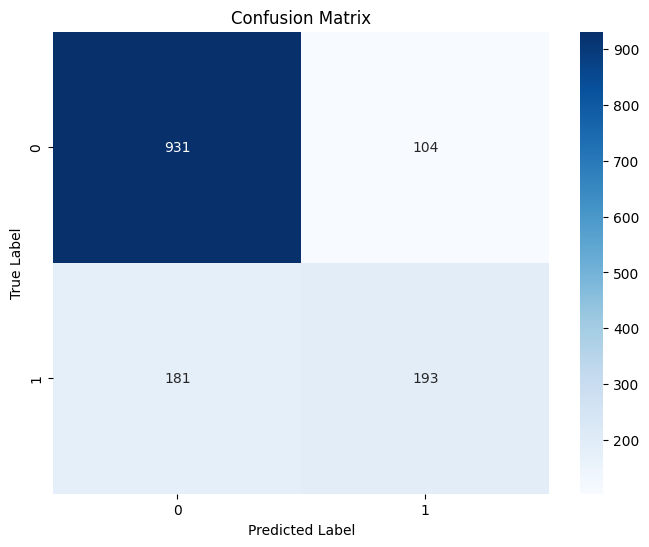

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred are already calculated from the previous step
y_true = y_test_encoded
y_pred = np.argmax(network.predict(X_test_prep), axis=1)


cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:
              precision    recall  f1-score      support
0              0.837230  0.899517  0.867257  1035.000000
1              0.649832  0.516043  0.575261   374.000000
accuracy       0.797729  0.797729  0.797729     0.797729
macro avg      0.743531  0.707780  0.721259  1409.000000
weighted avg   0.787488  0.797729  0.789750  1409.000000


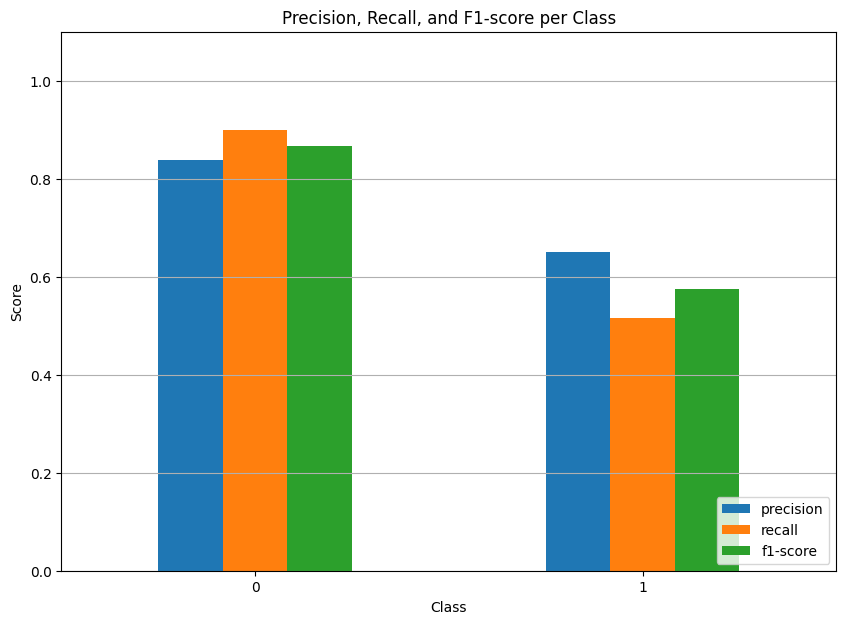

In [119]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_true and y_pred are already calculated from the previous step
y_true = y_test_encoded
y_pred = np.argmax(network.predict(X_test_prep), axis=1)

report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("Classification Report:")
print(df_report)

# Remove accuracy, macro avg and weighted avg rows for plotting
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 7))
plt.title('Precision, Recall, and F1-score per Class')
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

**Optimización con Hyperband**

In [120]:
!pip install keras-tuner
import kerastuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00


/tmp/ipython-input-1657191961.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


Se definiran varias funciones de activacion 'relu', 'tanh', 'elu', se usara dropout para mejor generalizacion y usaremos funciones de optimizacion 'adam', 'rmsprop', 'sgd'

In [121]:
from tensorflow import keras
from tensorflow.keras import layers


def model_builder(hp):
    # Model definition
    model = keras.Sequential()

    # Tuning of the number of neurons of the hidden layer
    hp_units = hp.Int('units', min_value=32, max_value=256, step=32)

    # Tuning the number of layers
    hp_layers = hp.Int('layers', min_value=1, max_value=5, step=1)

    # Tuning activation function for hidden layers
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'elu'])

    # Tuning dropout rate
    hp_dropout = hp.Float('dropout_rate', min_value=0.0, max_value=0.5, step=0.1)

    # Input layer
    model.add(layers.Dense(units=hp_units, activation=hp_activation, input_shape=(X_train_prep.shape[1],)))
    model.add(layers.Dropout(hp_dropout))

    # Hidden layers
    for i in range(hp_layers):
        # Add the hidden layer with tuned activation function
        model.add(layers.Dense(units=hp_units, activation=hp_activation))
        model.add(layers.Dropout(hp_dropout))

    # Output layer
    model.add(layers.Dense(2, activation='softmax'))

    # Select the optimum value for learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 5e-3])

    # Tuning optimizer
    hp_optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd'])

    if hp_optimizer == 'adam':
        optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate)
    elif hp_optimizer == 'rmsprop':
        optimizer = keras.optimizers.RMSprop(learning_rate=hp_learning_rate)
    else:
        optimizer = keras.optimizers.SGD(learning_rate=hp_learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',  # Para 2 clases con one-hot encoding
        metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
    )

    return model

In [122]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

tuner = kt.Hyperband(
    model_builder,
    objective= 'val_accuracy',
    max_epochs=10,
    factor=3,
    directory='hp_dir',
    project_name='ruters_dataset'
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [123]:
# We create a callback function that clears the output
import IPython
import tensorflow as tf

class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [124]:
!rm -R hp_dir/

In [125]:
X_train.shape

(5634, 10)

In [126]:
# Preprocess the training and testing data for Keras Tuner
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Execution of the tuning process
tuner.search(
    X_train_processed,
    y_train_prep, # Changed from Y_train
    epochs=20,
    validation_data=(X_test_processed, y_test_prep), # Changed from X_val, Y_val
    callbacks=[ClearTrainingOutput()] # a callback can be Early Stop
)

Trial 30 Complete [00h 00m 10s]
val_accuracy: 0.7870830297470093

Best val_accuracy So Far: 0.8005678057670593
Total elapsed time: 00h 03m 43s


In [127]:
tuner.search(
    X_train,
    y_train_prep,
    epochs=20,
    validation_data=(X_test_prep, y_test_prep),
    callbacks=[ClearTrainingOutput()]
)

In [128]:
# Obtaining the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Units:", best_hps.get('units'))
print("Layers:", best_hps.get('layers'))

Units: 64
Layers: 1


In [129]:
from tensorflow.keras.callbacks import EarlyStopping

# Definir EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',       # Métrica a monitorear
    patience=5,               # Número de épocas sin mejora antes de detener
    restore_best_weights=True # Recuperar los mejores pesos alcanzados
)

# Construir el modelo con los mejores hiperparámetros
model = tuner.hypermodel.build(best_hps)

# Preprocess X_train and X_test using the preprocessor
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# We also need to preprocess y_train and y_test for the model (one-hot encode)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and y_test are still the original string labels
# If y_train_encoded/y_test_encoded are already available from previous steps, you can use them directly
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

y_train_prep = to_categorical(y_train_encoded)
y_test_prep = to_categorical(y_test_encoded)


# Entrenar con EarlyStopping
history = model.fit(
    X_train_processed,  # Use processed training features
    y_train_prep,       # Use preprocessed training labels (one-hot encoded)
    epochs=50,                      # Máximo de épocas
    validation_data=(X_test_processed, y_test_prep), # Use processed test features and labels
    callbacks=[early_stop],         # 👈 Agregamos el callback
    verbose=1                       # Muestra el progreso del entrenamiento
)

Epoch 1/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7056 - loss: 0.5659 - precision_3: 0.7056 - recall_3: 0.7056 - val_accuracy: 0.7835 - val_loss: 0.4422 - val_precision_3: 0.7835 - val_recall_3: 0.7835
Epoch 2/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7970 - loss: 0.4429 - precision_3: 0.7970 - recall_3: 0.7970 - val_accuracy: 0.7906 - val_loss: 0.4281 - val_precision_3: 0.7906 - val_recall_3: 0.7906
Epoch 3/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7857 - loss: 0.4348 - precision_3: 0.7857 - recall_3: 0.7857 - val_accuracy: 0.7935 - val_loss: 0.4250 - val_precision_3: 0.7935 - val_recall_3: 0.7935
Epoch 4/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7966 - loss: 0.4331 - precision_3: 0.7966 - recall_3: 0.7966 - val_accuracy: 0.7928 - val_loss: 0.4237 - val_precision_3: 0.7928 - val_recall_3: 0.7928
Epoch 5/50
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8022 - loss: 0.4191 - precision_3: 0.8022 - recall_3: 0.8022 -

In [130]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,096 (66.79 KB)

 Trainable params: 5,698 (22.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,398 (44.53 KB)

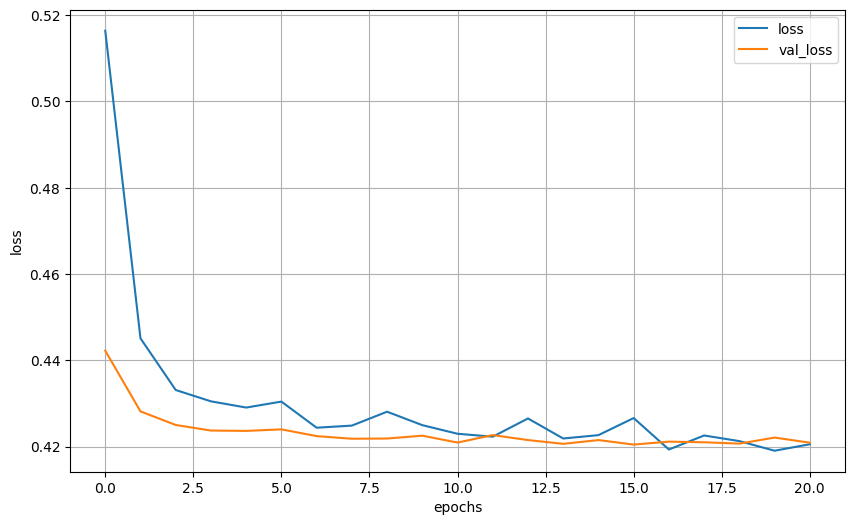

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

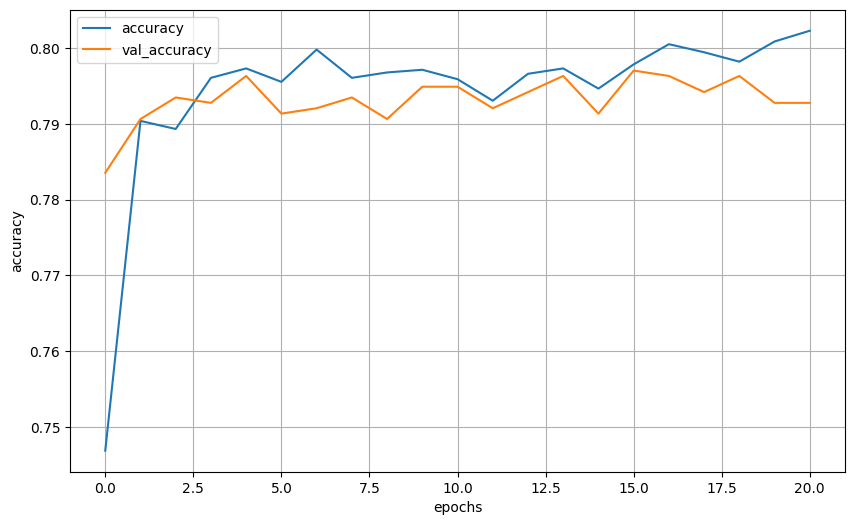

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot(figsize=(10, 6))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [133]:
model.evaluate(X_test_processed, y_test_prep)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7944 - loss: 0.4254 - precision_3: 0.7944 - recall_3: 0.7944


[0.4204622805118561,
 0.7970191836357117,
 0.7970191836357117,
 0.7970191836357117]

In [134]:
model.predict(X_test_processed).round(0)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Classification Report:
              precision    recall  f1-score      support
0              0.836478  0.899517  0.866853  1035.000000
1              0.648649  0.513369  0.573134   374.000000
accuracy       0.797019  0.797019  0.797019     0.797019
macro avg      0.742563  0.706443  0.719994  1409.000000
weighted avg   0.786621  0.797019  0.788889  1409.000000

Accuracy: 0.7970
AUC Score: 0.8399


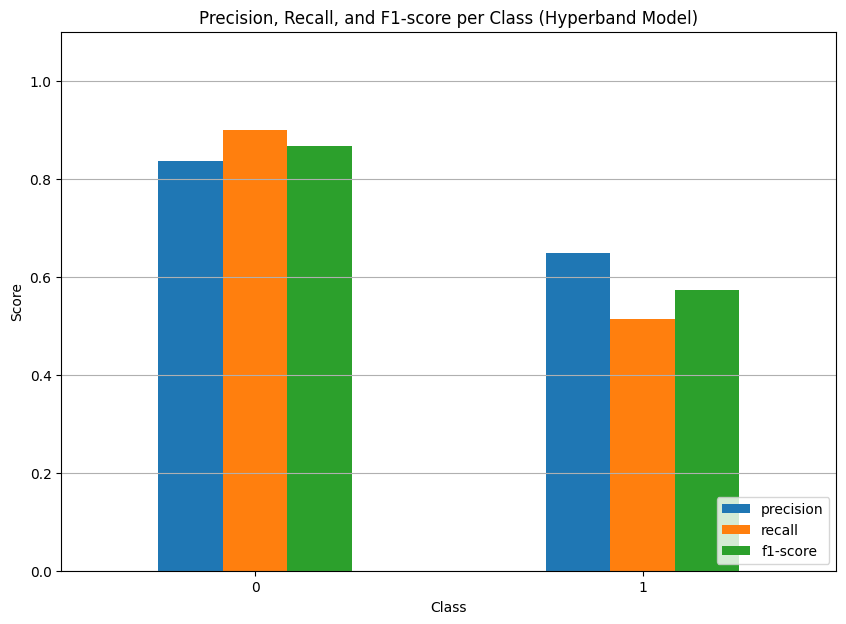

In [142]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'df' and 'top_15_cols' are available from previous steps
# If not, you might need to reload and preprocess the data here as well.

# Re-encode the target variable to ensure y_test_encoded is defined
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Assuming X_test_processed is available from a previous preprocessing step
# If not, you'll need to apply the preprocessor here:
# X_test_processed = preprocessor.transform(X_test)


y_true = y_test_encoded
y_pred_prob = model.predict(X_test_processed) # Get probabilities for AUC
y_pred = np.argmax(y_pred_prob, axis=1) # Use the tuned model and processed test data


report = classification_report(y_true, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("Classification Report:")
print(df_report)

# Calculate Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Calculate AUC
auc_score = roc_auc_score(y_true, y_pred_prob[:, 1]) # AUC for the positive class (1)
print(f"AUC Score: {auc_score:.4f}")


# Remove accuracy, macro avg and weighted avg rows for plotting
df_report = df_report.drop(index=['accuracy', 'macro avg', 'weighted avg'])

df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10, 7))
plt.title('Precision, Recall, and F1-score per Class (Hyperband Model)') # Updated title
plt.xlabel('Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.show()

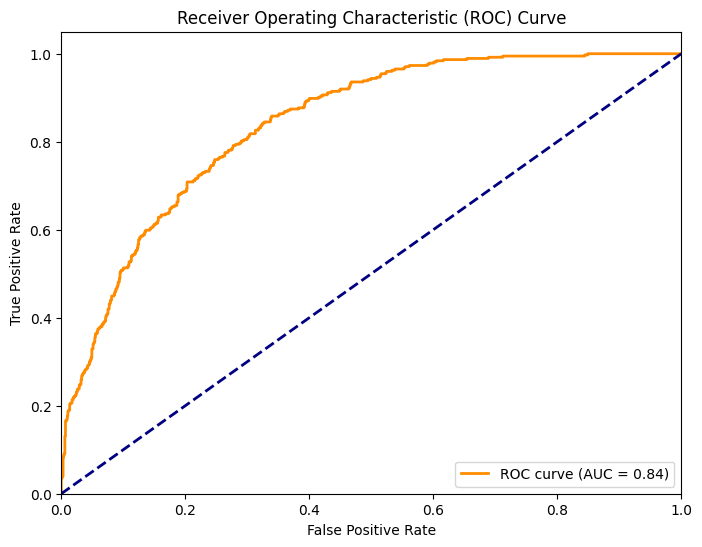

In [143]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test_encoded and y_pred_prob are available from previous steps

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_prob[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [136]:
# Obtaining the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best Hyperparameters found by Hyperband:")
print(f"  Units: {best_hps.get('units')}")
print(f"  Layers: {best_hps.get('layers')}")
print(f"  Activation: {best_hps.get('activation')}")
print(f"  Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"  Learning Rate: {best_hps.get('learning_rate')}")
print(f"  Optimizer: {best_hps.get('optimizer')}")

Best Hyperparameters found by Hyperband:
  Units: 64
  Layers: 1
  Activation: tanh
  Dropout Rate: 0.1
  Learning Rate: 0.0001
  Optimizer: adam


AUC Curve muestra mejora en el modelo con valor de 0.84, los resultados muestran que en esta ocasion los mejores parametros fueron y 'adam' con dropout de 0.1 una capa oculta de 64 neuronas y funcion de activacion 'tanh'

# EVALUACION DEL MODELO

Este es el resultado para clase 1

Para la red neuronal con todas las caracteristicas (20)

Precision: 0.689420  |  Recall:0.541555  |  F1: 0.606607

accuracy   0.814053

Y este con el uso de hyperband y 10 caracteristicas

Precision:0.648649  |  Recall: 0.513369  |   F1:0.573134   

accuracy: 0.797019



*   ** La red Neuronal con todas las caracteristicas sigue ofreciendo mejores resultados en general aunque hyperband se acerca bastante y usa 10 caracteristicas **




#### **ALGORITMO STACKING **

Se usaran modelos poco sensibles a outliers

In [137]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Definimos los modelos base (menos sensibles a outliers)
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)), # Keeping Decision Tree
    ('gb', GradientBoostingClassifier(random_state=42)), # Adding Gradient Boosting
    ('ab', AdaBoostClassifier(random_state=42)) # Adding AdaBoost
]

# Creamos el StackingClassifier con RandomForest como meta-modelo
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=RandomForestClassifier(random_state=42), # Keeping Random Forest as meta-model
    passthrough=False,
    cv=5
)

# Integrar con tu pipeline de preprocesamiento
pipeline_stacking = Pipeline([
    ('preprocessor', preprocessor),
    ('stacking', stacking_clf)
])

In [138]:
# Entrenamiento
pipeline_stacking.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('imputacion_nom',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encodage_nom',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Contract',
                                                   'InternetService',
                                                   'PaymentMethod', 'gender',
                                                   'PaperlessBilling',
                                                   'Partner', 'OnlineBackup']),
                                                 ('num',
                                                  Pipeline(steps=[('...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('escalamiento',
                                                                   StandardScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure'])])),
                ('stacking',
                 StackingClassifier(cv=5,
                                    estimators=[('dt',
                                                 DecisionTreeClassifier(random_state=42)),
                                                ('gb',
                                                 GradientBoostingClassifier(random_state=42)),
                                                ('ab',
                                                 AdaBoostClassifier(random_state=42))],
                                    final_estimator=RandomForestClassifier(random_state=42)))])

Stacking Classifier Performance:
Accuracy: 0.7686302342086586

Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.86      0.85      1035
         Yes       0.57      0.51      0.54       374

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.76      0.77      0.76      1409



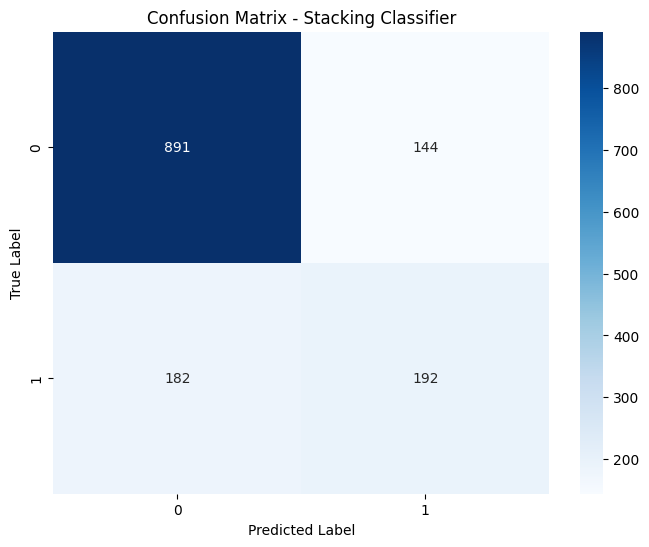

In [139]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Make predictions with the stacking classifier on the test set
# Use the original X_test DataFrame (with top 15 features) for prediction
y_pred_stacking = pipeline_stacking.predict(X_test)

# Evaluate the stacking classifier
print("Stacking Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_stacking))

# Confusion Matrix for Stacking Classifier
cm_stacking = confusion_matrix(y_test, y_pred_stacking)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()

Estos resultados para stacking
**texto en negrita**

Precision: 0.57   |    Recall: 0.51    |   F1:0.54

accuracy 0.77      

--
**Para la red neuronal con todas las caracteristicas (20)**


Precision: 0.689420  |  Recall:0.541555  |  F1: 0.606607

accuracy   0.814053

--

Y este con el uso de hyperband y 10 caracteristicas

**texto en negrita**

Precision:0.648649  |  Recall: 0.513369  |   F1:0.573134   

accuracy: 0.797019

La seleccion de caracteristicas no mejoro los resultados en stacking, aunque el valor sigue siendo aceptable muy siendo muy cercano a la red neuronal con todas las caracteristicas 

Modelo con hyperband muestra mejores resultados que algoritmo de stacking

***-La red neuronal con todas las caracteristicas sigue manteniendo los mejores resultados***

# Carga y Preprocesamiento de Datos

El proyecto comenzó cargando el conjunto de datos telco.csv en un DataFrame de pandas. Se realizó una exploración inicial de los datos para comprender su estructura y contenido.

Los pasos de preprocesamiento incluyeron:

Manejar los valores "No internet service" en las columnas relevantes reemplazándolos por "No".

Convertir la columna TotalCharges a tipo numérico, forzando los errores para manejar valores no numéricos.

Identificar las columnas numéricas y nominales (categóricas).

Dividir los datos en características (X) y variable objetivo (y), eliminando customerID y Churn de las características.

Tratar los valores faltantes en las columnas numéricas mediante imputación de la mediana, y en las columnas categóricas mediante imputación del valor más frecuente.

Aplicar codificación one-hot a las variables nominales y escalado estándar a las variables numéricas utilizando un ColumnTransformer.

# Selección de Características

La importancia de las características se calculó utilizando un modelo de Bosque Aleatorio (Random Forest) para identificar las más relevantes en la predicción de la cancelación.
Se seleccionaron las 15 características principales para el entrenamiento posterior de los modelos.


# Comparación de Modelos

Comparando las métricas de desempeño en el conjunto de prueba:

| Modelo                             | Exactitud | Precisión (Churn 'Yes') | Recall (Churn 'Yes') | F1-score (Churn 'Yes') |
|------------------------------------|-----------|-------------------------|----------------------|------------------------|
| Red Neuronal (Todas las Características) | 0.8140    | 0.6890                  | 0.54155               | 0.606                 |
| Red Neuronal ajustada con Hyperband | 0.7970    | 0.6486                  | 0.5129               | 0.57                 |
| Clasificador por Stacking       | 0.7708    | 0.57                    | 0.51                 | 0.54                   |




Según las métricas de evaluación, la Red Neuronal entrenada con todas las características y la Red Neuronal ajustada con Hyperband utilizando las 15 características principales lograron el mejor rendimiento general en términos de exactitud y F1-score para la clase de cancelación. La Red Neuronal con todas las características tuvo la mayor precisión para la clase "Yes", mientras que la Red Neuronal ajustada con Hyperband tuvo un mejor recall y F1-score para la clase "Yes".

## Conclusión

La Red Neuronal con todas las caracteristicas parecen ser los modelos más efectivos entre los explorados para predecir churn de clientes en este conjunto de datos, ofreciendo diferentes fortalezas en precisión y recall

Se podrían lograr mejoras adicionales explorando diferentes técnicas de ingeniería de características, investigando otras arquitecturas de modelos o implementando métodos de ensamblado e hiperajuste más avanzados.